In [23]:
from google.colab import drive
drive.mount('gdrive')

Mounted at gdrive


Saving/loading

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
X_train = X_train / 255
X_test = X_test / 255

X_train = X_train[:10000]
y_train = y_train[:10000]
X_test = X_test[:1000]
y_test = y_test[:1000]

170500096/170498071 [==============================] - 2s 0us/step


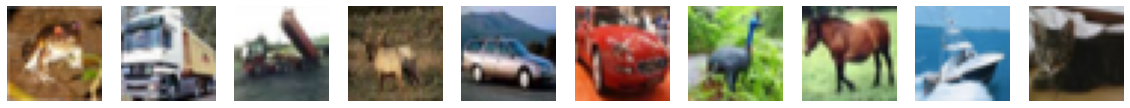

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 10, figsize=(20,5))
for i in range(10):
  ax[i].set_axis_off()
  ax[i].imshow(X_train[i])

In [ ]:
def get_test_accuracy(model, X_test, y_test):
  test_loss, test_acc = model.evaluate(x=X_test, y=y_test, verbose=0)
  print('accuracy: {acc:0.3f}'.format(acc=test_acc))

In [ ]:
def get_new_model():
  model = Sequential([
                      Conv2D(16, 3, activation='relu', input_shape=(32,32,3)),
                      Conv2D(8, 3, activation='relu'),
                      MaxPooling2D(4),
                      Flatten(),
                      Dense(32, activation='relu'),
                      Dense(10, activation='softmax')
  ])
  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
  return model

In [ ]:
model = get_new_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 16)        448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 8)         1160      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 7, 7, 8)           0         
_________________________________________________________________
flatten (Flatten)            (None, 392)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                12576     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 14,514
Trainable params: 14,514
Non-trainable params: 0
____________________________________________________

In [ ]:
get_test_accuracy(model, X_test, y_test)

accuracy: 0.089


In [ ]:
checkpoint_path = 'model_checkpoints'
checkpoint = ModelCheckpoint(checkpoint_path,
                             save_freq='epoch',
                             save_weights_only=False,
                             verbose=1)

In [ ]:
model = get_new_model()
history = model.fit(X_train, y_train, epochs=3, batch_size=10, validation_split=0.15, callbacks=[checkpoint])

Epoch 1/3
850/850 [==============================] - 13s 15ms/step - loss: 1.8728 - accuracy: 0.3135 - val_loss: 1.6759 - val_accuracy: 0.3933

Epoch 00001: saving model to model_checkpoints
INFO:tensorflow:Assets written to: model_checkpoints/assets
Epoch 2/3
850/850 [==============================] - 12s 14ms/step - loss: 1.5261 - accuracy: 0.4474 - val_loss: 1.4660 - val_accuracy: 0.4567

Epoch 00002: saving model to model_checkpoints
INFO:tensorflow:Assets written to: model_checkpoints/assets
Epoch 3/3
850/850 [==============================] - 11s 13ms/step - loss: 1.3787 - accuracy: 0.5001 - val_loss: 1.4249 - val_accuracy: 0.4833

Epoch 00003: saving model to model_checkpoints
INFO:tensorflow:Assets written to: model_checkpoints/assets


In [ ]:
! ls -lh model_checkpoints

total 156K
drwxr-xr-x 2 root root 4.0K Jul  2 20:51 assets
-rw-r--r-- 1 root root  14K Jul  2 20:52 keras_metadata.pb
-rw-r--r-- 1 root root 132K Jul  2 20:52 saved_model.pb
drwxr-xr-x 2 root root 4.0K Jul  2 20:52 variables


In [ ]:
! ls -lh model_checkpoints/variables

total 184K
-rw-r--r-- 1 root root 177K Jul  2 20:52 variables.data-00000-of-00001
-rw-r--r-- 1 root root 2.2K Jul  2 20:52 variables.index


In [ ]:
get_test_accuracy(model, X_test, y_test)

accuracy: 0.513


In [ ]:
model = load_model(checkpoint_path)
get_test_accuracy(model, X_test, y_test)

accuracy: 0.513


In [ ]:
model.save('my_model.h5')

In [ ]:
! ls -lh my_model.h5

-rw-r--r-- 1 root root 77K Jul  2 20:55 my_model.h5


In [ ]:
del model
model = load_model('my_model.h5')

In [ ]:
get_test_accuracy(model, X_test, y_test)

accuracy: 0.513


In [ ]:
! rm -r model_checkpoints #this clears the model_checkpoints directory

In [ ]:
X_train = X_train[:100]
y_train = y_train[:100]
X_test = X_test[:100]
y_test = y_test[:100]

In [ ]:
model = get_new_model()

checkpoint_best_path = 'model_checkpoints_best/checkpoint_{val_accuracy:.2f}'
checkpoint_best = ModelCheckpoint(checkpoint_best_path,
                                  save_weights_only=True,
                                  save_freq='epoch',
                                  monitor='val_accuracy',
                                  save_best_only=True,
                                  verbose=1)

In [ ]:
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), batch_size=10, callbacks=[checkpoint_best], verbose=0)


Epoch 00001: val_accuracy improved from -inf to 0.12000, saving model to model_checkpoints_best/checkpoint_0.12

Epoch 00002: val_accuracy did not improve from 0.12000

Epoch 00003: val_accuracy did not improve from 0.12000

Epoch 00004: val_accuracy did not improve from 0.12000

Epoch 00005: val_accuracy did not improve from 0.12000

Epoch 00006: val_accuracy did not improve from 0.12000

Epoch 00007: val_accuracy did not improve from 0.12000

Epoch 00008: val_accuracy improved from 0.12000 to 0.15000, saving model to model_checkpoints_best/checkpoint_0.15

Epoch 00009: val_accuracy did not improve from 0.15000

Epoch 00010: val_accuracy did not improve from 0.15000

Epoch 00011: val_accuracy improved from 0.15000 to 0.17000, saving model to model_checkpoints_best/checkpoint_0.17

Epoch 00012: val_accuracy did not improve from 0.17000

Epoch 00013: val_accuracy did not improve from 0.17000

Epoch 00014: val_accuracy did not improve from 0.17000

Epoch 00015: val_accuracy improved fro

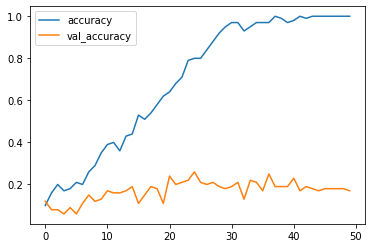

In [ ]:
df = pd.DataFrame(history.history)
df.plot(y=['accuracy', 'val_accuracy'])

In [ ]:
!ls -lh model_checkpoints_best

total 2.0M
-rw-r--r-- 1 root root   87 Jul  2 17:18 checkpoint
-rw-r--r-- 1 root root 174K Jul  2 17:18 checkpoint_0.05.data-00000-of-00001
-rw-r--r-- 1 root root 2.0K Jul  2 17:18 checkpoint_0.05.index
-rw-r--r-- 1 root root 174K Jul  2 17:18 checkpoint_0.06.data-00000-of-00001
-rw-r--r-- 1 root root 2.0K Jul  2 17:18 checkpoint_0.06.index
-rw-r--r-- 1 root root 174K Jul  2 17:18 checkpoint_0.08.data-00000-of-00001
-rw-r--r-- 1 root root 2.0K Jul  2 17:18 checkpoint_0.08.index
-rw-r--r-- 1 root root 174K Jul  2 17:18 checkpoint_0.12.data-00000-of-00001
-rw-r--r-- 1 root root 2.0K Jul  2 17:18 checkpoint_0.12.index
-rw-r--r-- 1 root root 174K Jul  2 17:18 checkpoint_0.13.data-00000-of-00001
-rw-r--r-- 1 root root 2.0K Jul  2 17:18 checkpoint_0.13.index
-rw-r--r-- 1 root root 174K Jul  2 17:18 checkpoint_0.15.data-00000-of-00001
-rw-r--r-- 1 root root 2.0K Jul  2 17:18 checkpoint_0.15.index
-rw-r--r-- 1 root root 174K Jul  2 17:18 checkpoint_0.17.data-00000-of-00001
-rw-r--r-- 1 root ro

In [ ]:
new_model = get_new_model()
new_model.load_weights('model_checkpoints_best/checkpoint_0.26')
get_test_accuracy(new_model, X_test, y_test)

accuracy: 0.260


In [ ]:
! rm -r model_checkpoints
! rm -r model_checkpoints_5000
! rm -r model_checkpoints_best

rm: cannot remove 'model_checkpoints_5000': No such file or directory
rm: cannot remove 'model_checkpoints_best': No such file or directory


#loading pre-trained models
pre-trained model documentation on this URL: [keras.io/applications](keras.io/applications)

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50

model = ResNet50(weights='imagenet')

102973440/102967424 [==============================] - 1s 0us/step


In [ ]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [27]:
from tensorflow.keras.preprocessing.image import load_img
lemon_img = load_img('drive/MyDrive/Colab Notebooks/Images/lemon.jpg', target_size=(224,224))

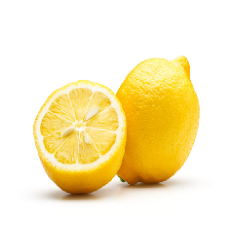

In [30]:
plt.imshow(lemon_img)
plt.gca().set_axis_off()

In [36]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

def get_top_5_predictions(img):
  x = img_to_array(img)[np.newaxis, ...]
  x = preprocess_input(x)
  preds = decode_predictions(model.predict(x), top=5)
  top_preds = pd.DataFrame(columns=['prediction', 'probability'], index=np.arange(5)+1)
  for i in range(5):
    top_preds.loc[i+1, 'prediction'] = preds[0][i][1]
    top_preds.loc[i+1, 'probability'] = preds[0][i][2]
  return top_preds

In [37]:
get_top_5_predictions(lemon_img)

40960/35363 [==================================] - 0s 0us/step


,prediction,probability
1,lemon,0.992648
2,orange,0.00734689
3,pineapple,1.30757e-06
4,banana,1.22972e-06
5,jackfruit,9.39878e-07


# Tensorflow hub
- has a lot of reusable machine learning modules
- e.g. image classification, image generator

In [38]:
! pip install --upgrade tensorflow-hub

Requirement already up-to-date: tensorflow-hub in /usr/local/lib/python3.7/dist-packages (0.12.0)


In [39]:
import tensorflow_hub as hub

module_url = 'https://tfhub.dev/google/imagenet/mobilenet_v1_050_160/classification/4'
model = Sequential([hub.KerasLayer(module_url)])
model.build(input_shape=[None, 160, 160, 3])

In [40]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1001)              1343049   
Total params: 1,343,049
Trainable params: 0
Non-trainable params: 1,343,049
_________________________________________________________________


In [ ]:
lemon_img = load_img('drive/MyDrive/Colab Notebooks/Images/lemon.jpg', target_size=(160, 160))

In [58]:
from urllib.request import urlopen
import re

txt_file = str(urlopen('https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt').read())
categories = re.split(r'\\n', txt_file)
categories = categories[:-1]

In [62]:
def get_top_5_predictions(img):
  x = img_to_array(img)[np.newaxis, ...] / 255
  preds = model.predict(x)
  top_preds = pd.DataFrame(columns=['prediction'], index=np.arange(5)+1)
  sorted_index = np.argsort(-preds[0])
  for i in range(5):
    ith_pred = categories[sorted_index[i]]
    top_preds.loc[i+1, 'prediction'] = ith_pred
    print(categories[sorted_index[i]])
  return top_preds

In [63]:
get_top_5_predictions(lemon_img)

lemon
orange
Granny Smith
banana
tennis ball


,prediction
1,lemon
2,orange
3,Granny Smith
4,banana
5,tennis ball
